In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Import df for all lakes
total_lakes_df = pd.read_csv("/Users/emiliodulay/Documents/Programming/Math-42-Final-Project/complete lakes df")

# Create df for lake superior
superior = total_lakes_df[total_lakes_df['lake'] == "Superior"]

# Convert Units for evap, flow, precip (mm to m)
superior['precipitation'] = superior['precipitation'] / 1000
superior['evaporation'] = superior['evaporation'] / 1000
superior['flow'] = superior['flow'] / 1000

# Reorder Columns so that they follow the order of our model
superior = superior.loc[:,['month', 'year', 'lake', 'water level', 'precipitation', 'flow', 'evaporation']]

# Create df for lake S starting at 1988
superior_1988 = superior.iloc[-396:,:].drop(columns= 'lake').reset_index(drop=True)
superior_1988.head()

/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_47452/246894595.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superior['precipitation'] = superior['precipitation'] / 1000
/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_47452/246894595.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superior['evaporation'] = superior['evaporation'] / 1000
/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_47452/246894595.py:10: SettingWithCopyWarning: 
A value is trying to be set on a 

,month,year,water level,precipitation,flow,evaporation
0,1,1988,183.29,0.09561,0.74480,0.02289
1,2,1988,183.22,0.08477,0.92402,0.03598
2,3,1988,183.17,0.04761,1.30492,0.00825
3,4,1988,183.20,0.04684,1.58457,0.03550
4,5,1988,183.24,0.05016,0.89001,0.02357


# Stochastic Error Model: w(n) = w(n-1) + p(n-1) + f(n-1) - e(n-1) + epsilon

w(n) : expected water level
w(n-1) : previous months water level
p(n-1) : previous months precipitation 
f(n-1) : previous months flow
e(n-1) : previous months evaporation
epsilon : NORMAL RV for the error of the expected values distribution

In [33]:
p = superior_1988['precipitation']
f = superior_1988['flow']
e = superior_1988['evaporation']
actual = superior_1988['water level']

In [63]:
# Calculate "rough" approximation
preerror_approx = superior_1988['water level'] + p + f - e
actual = superior_1988['water level']
# Error between actual and "rough" approximation
residuals = actual - preerror_approx

In [64]:
# Error statistics
residuals.describe()

count    396.000000
mean      -1.136996
std        0.758758
min       -4.215040
25%       -1.619280
50%       -0.967340
75%       -0.568275
max        1.043730
dtype: float64

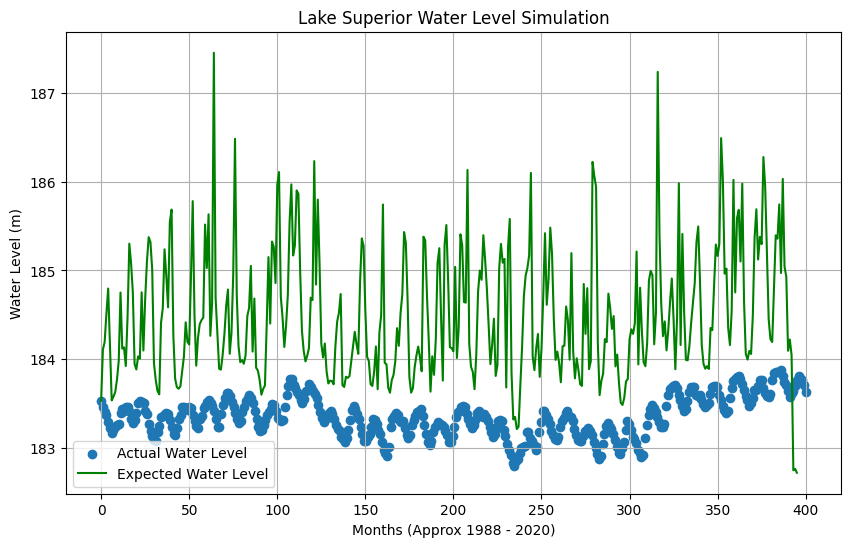

In [91]:
n = 396  # Number of steps
initial_water_level = 183.53  # Initial water level for Lake Superior

# Initialize water levels
expected = [initial_water_level]

# Simulate water levels
for i in range(1, n):   
    # Error RV
    epsilon = np.random.normal(residuals.mean(), residuals.std() * 0.001)
    
    # Calculate the new water level
    new_level = superior_1988['water level'][i-1] + p[i-1] + f[i-1] - e[i-1] #+ epsilon

    expected.append(max(new_level, 0))  # Prevent negative water levels
# Model Accuracy


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 400, 400), superior.iloc[-400:, 3], label = "Actual Water Level")
plt.plot(range(n), expected, label="Expected Water Level", color='green')
plt.xlabel("Months (Approx 1988 - 2020)")
plt.ylabel("Water Level (m)")

plt.title("Lake Superior Water Level Simulation")
plt.legend()
plt.grid()
plt.show()



# Stochastic Error Model with Seasonal Weight

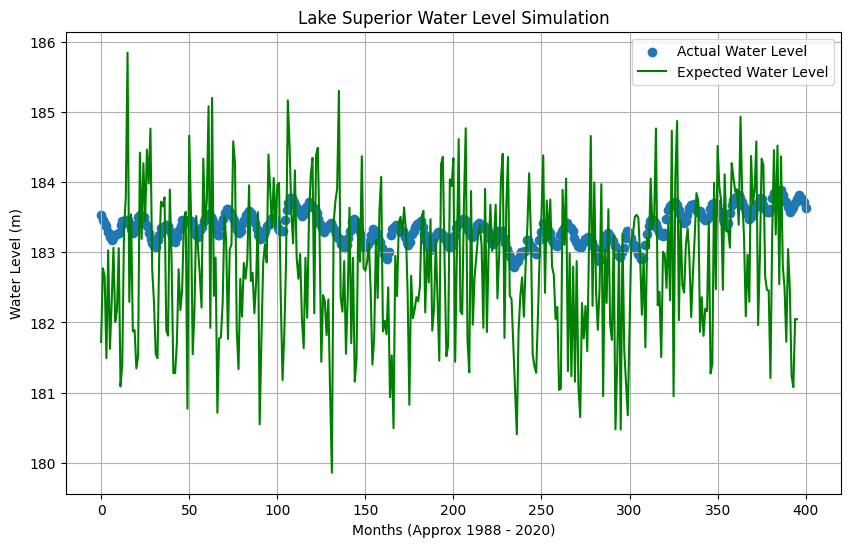

In [83]:
n = 396  # Number of steps
initial_water_level = 183.53  # Initial water level for Lake Superior

# Initialize water levels
expected = [initial_water_level]

# Simulate water levels
for i in range(1, n):   
    # Compute gradient and cumulative sum
    gradient = np.diff(preerror_approx)
    cumulative_gradient = np.cumsum(np.append(0, gradient))  # Add initial value

    # Build a smooth trend line
    expected_trend = initial_water_level + cumulative_gradient

    # Add error term to simulate water levels
    expected = expected_trend + np.random.normal(residuals.mean(), residuals.std(), size=n)
    expected = np.maximum(expected, 0)  # Prevent negative water levels

# Model Accuracy


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 400, 400), superior.iloc[-400:, 3], label = "Actual Water Level")
plt.plot(range(n), expected, label="Expected Water Level", color='green')
plt.xlabel("Months (Approx 1988 - 2020)")
plt.ylabel("Water Level (m)")
#plt.ylim(182, 184)
plt.title("Lake Superior Water Level Simulation")
plt.legend()
plt.grid()
plt.show()

